<h1 style="color:#7FDBFF; font-weight:bold; font-family:Arial, sans-serif;">
Curve Fitting for Solar Energy Production using Numerical Analysis
</h1>

<span style="color:#7FDBFF;">📘 Project Overview</span>
<p style="font-size:16px; color:#FFFFF; line-height:1.5;"> This project uses <strong>numerical analysis</strong> and <strong>curve fitting</strong> techniques to model and predict solar energy production over a 12-hour period. We'll use <em>polynomial regression</em> to fit a curve to a sample dataset (actual vs predicted solar power production) and evaluate the accuracy using <span style="color:#FF6F61;">RMSE</span>, <span style="color:#2ECC40;">R²</span>, and <span style="color:#FFDC00;">MAPE</span>. </p>

### <span style="color:#7FDBFF;">Importing Required Libraries</span>

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


### <span style="color:#7FDBFF;">Dataset Description</span>

The dataset consists of the following columns:

- <span style="color:#FFDC00;"><strong>Hour</strong></span>: Represents the time of day in hours (from 6 AM to 5 PM).
- <span style="color:#2ECC40;"><strong>Actual</strong></span>: The actual measured solar energy production in kilowatts (kW).
- <span style="color:#FF6F61;"><strong>Predicted</strong></span>: The predicted solar energy production obtained from the curve fitting model (in kW).


In [27]:

# Data setup
data = {
    'Hour': [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
    'Actual': [0.0, 1.2, 2.5, 4.0, 5.8, 6.5, 7.0, 6.6, 5.0, 3.2, 1.5, 0.3],
    'Predicted': [0.2, 1.0, 2.3, 3.8, 5.6, 6.7, 6.8, 6.4, 5.1, 3.0, 1.6, 0.5]
}


### <span style="color:#7FDBFF;">Creating the DataFrame</span>

In [28]:

df = pd.DataFrame(data)


### <span style="color:#7FDBFF;">Calculate Errors</span>

In [29]:

# Calculate errors
df['Error'] = df['Actual'] - df['Predicted']                   # Error = Actual - Predicted
df['Squared_Error'] = df['Error'] ** 2                         # Squared Error for RMSE
df['Absolute_Percent_Error'] = np.abs(df['Error'] / df['Actual'].replace(0, np.nan)) * 100  # % error for MAPE


### <span style="color:#7FDBFF;">RMSE calculation</span>

In [30]:

# RMSE calculation
mse = df['Squared_Error'].sum() / len(df)                              # Mean Squared Error
rmse = np.sqrt(mse)                                            # Root Mean Squared Error


### <span style="color:#7FDBFF;">R² Calculatation</span>

In [31]:

# R² calculation
mean_actual = df['Actual'].mean()                              # Mean of actual values
ss_total = ((df['Actual'] - mean_actual) ** 2).sum()           # Total Sum of Squares
ss_res = (df['Error'] ** 2).sum()                              # Residual Sum of Squares
r2 = 1 - (ss_res / ss_total)                                   # R² = 1 - (SS_res / SS_total)


### <span style="color:#7FDBFF;">Calculate MAPE</span>

In [32]:

# MAPE calculation
mape = df['Absolute_Percent_Error'].mean(skipna=True)          # Mean Absolute Percentage Error (skip division by zero rows)


### <span style="color:#7FDBFF;">Display Error Result</span>

In [33]:

# Print all results separately and summary
print('***----Evaluation Matrics----***')
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"MAPE: {mape:.2f}%")


***----Evaluation Matrics----***
RMSE: 0.1871
R² Score: 0.9941
MAPE: 11.24%


### <span style="color:#7FDBFF;">Plot the Actual and Predicted values</span>

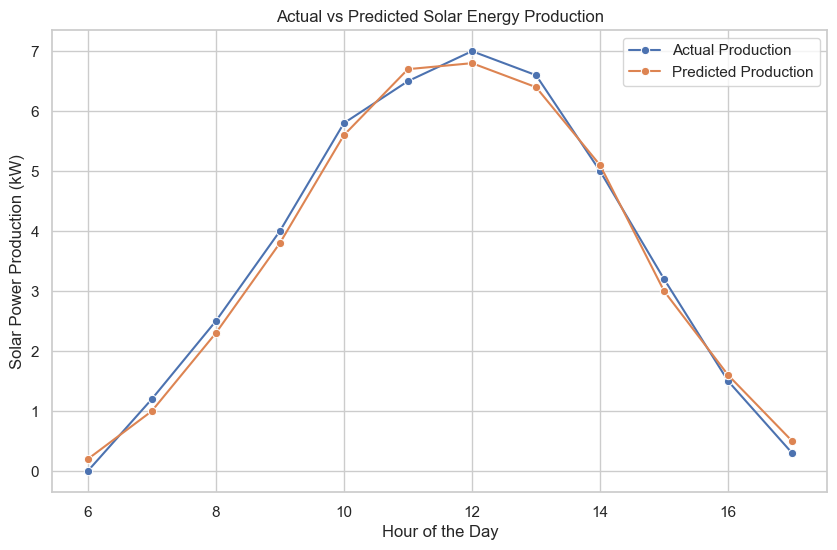

In [34]:

# Plot using seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='Hour', y='Actual', marker='o', label='Actual Production')
sns.lineplot(data=df, x='Hour', y='Predicted', marker='o', label='Predicted Production')
plt.title('Actual vs Predicted Solar Energy Production')
plt.xlabel('Hour of the Day')
plt.ylabel('Solar Power Production (kW)')
plt.legend()
plt.show()
